### Machine Learning in Banking 

### Steps employed are as follows:
* Data Preparation
* Data Summarization
* Data Visualization
* Feature Engineering 
* Model Building and Validation

### Data Preparation

In [1]:
#importing necessary library
import numpy as np #linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split,KFold
import re
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import SMOTE

In [2]:
#Loading the Data
df_train = pd.read_csv("C:/Users/ezeki/OneDrive/Desktop/ML inBanking Dataset_Analytic Vidhya/train_fNxu4vz.csv")
df_test = pd.read_csv("C:/Users/ezeki/OneDrive/Desktop/ML inBanking Dataset_Analytic Vidhya/test_fjtUOL8.csv")
df_submission = pd.read_csv("C:/Users/ezeki/OneDrive/Desktop/ML inBanking Dataset_Analytic Vidhya/sample_submission_HSqiq1Q.csv")

In [3]:
#Understanding the data
df_train.head(5)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [4]:
df_test.head(3)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,"26,000",10+ years,NaN,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,"6,075",< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male


In [5]:
df_train.shape

(164309, 14)

In [6]:
df_test.shape

(109541, 13)

In [8]:
# create data frame
df = pd.DataFrame(df_train)

In [429]:
def describe_dataframe(df=pd.DataFrame()):
    """This function generates descriptive stats of a dataframe
    Args:
        df (dataframe): the dataframe to be analyzed
    Returns:
        None

    """
    print("\n\n")
    print("*"*30)
    print("About the Data")
    print("*"*30)
    
    print("Number of rows::",df.shape[0])
    print("Number of columns::",df.shape[1])
    print("\n")
    
    print("Column Names::",df.columns.values.tolist())
    print("\n")
    
    print("Column Data Types::\n",df.dtypes)
    print("\n")
    
    print("Columns with Missing Values::",df.columns[df.isnull().any()].tolist())
    print("\n")
    
    print("Number of rows with Missing Values::",len(pd.isnull(df).any(1).nonzero()[0].tolist()))
    print("\n")
    
    print("Sample Indices with missing data::",pd.isnull(df).any(1).nonzero()[0].tolist()[0:5])
    print("\n")
    
    print("General Stats::")
    print(df.info())
    print("\n")
    
    print("Summary Stats::")
    print(df.describe())
    print("\n")
    
    print("Dataframe Sample Rows::")
    display(df.head(5))

In [430]:
describe_dataframe(df)




******************************
About the Data
******************************
Number of rows:: 164309
Number of columns:: 14


Column Names:: ['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner', 'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income', 'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts', 'Total_Accounts', 'Gender', 'Interest_Rate']


Column Data Types::
 Loan_ID                      int64
Loan_Amount_Requested       object
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency    float64
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
Interest_Rate                int64
dtype: object


Columns with Missing Values:: ['Length_Employed', 'Home_Owner', 'A

C:\Users\ezeki\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
C:\Users\ezeki\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead


Number of rows with Missing Values:: 112343


Sample Indices with missing data:: [0, 1, 2, 3, 4]


General Stats::
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
Loan_ID                    164309 non-null int64
Loan_Amount_Requested      164309 non-null object
Length_Employed            156938 non-null object
Home_Owner                 138960 non-null object
Annual_Income              139207 non-null float64
Income_Verified            164309 non-null object
Purpose_Of_Loan            164309 non-null object
Debt_To_Income             164309 non-null float64
Inquiries_Last_6Mo         164309 non-null int64
Months_Since_Deliquency    75930 non-null float64
Number_Open_Accounts       164309 non-null int64
Total_Accounts             164309 non-null int64
Gender                     164309 non-null object
Interest_Rate              164309 non-null int64
dtypes: float64(3), int64(5), object(6)
memory usage: 17.6+ MB
None


Summary

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [431]:
#Missing Values and Data Types
d1 = df_train.isnull().sum().to_frame().rename(columns={0: "Train_Null_Values"})
d2 = df_test.isnull().sum().to_frame().rename(columns={0: "Test_Null_Values"})
d3 = df_train.dtypes.to_frame().rename(columns={0:"Data_Type"})
pd.concat([d1, d2, d3], axis=1)

C:\Users\ezeki\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,Train_Null_Values,Test_Null_Values,Data_Type
Annual_Income,25102,16898.0,float64
Debt_To_Income,0,0.0,float64
Gender,0,0.0,object
Home_Owner,25349,16711.0,object
Income_Verified,0,0.0,object
Inquiries_Last_6Mo,0,0.0,int64
Interest_Rate,0,NaN,int64
Length_Employed,7371,4936.0,object
Loan_Amount_Requested,0,0.0,object
Loan_ID,0,0.0,int64


### Exploatory Data Analysis

In [432]:
### Target Exploration
df_train['Interest_Rate'].value_counts(normalize=True)

2    0.429557
3    0.364697
1    0.205746
Name: Interest_Rate, dtype: float64

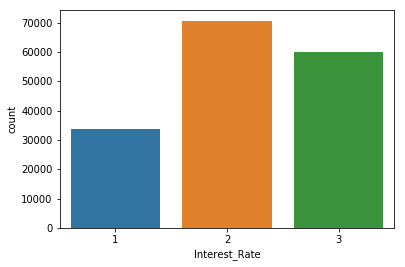

In [433]:
sns.countplot(df_train["Interest_Rate"])

### Data Summarization

### Univariate Analysis & Missing Value_Treatment

In [434]:
train=df_train.append(df_test, sort=False)

In [435]:
train.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner', 'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income', 'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts', 'Total_Accounts', 'Gender', 'Interest_Rate'], dtype='object')

In [436]:
#Getting a list of categorical variable
categorical_variables = train.dtypes.loc[train.dtypes=='object'].index
print (categorical_variables)

Index(['Loan_Amount_Requested', 'Length_Employed', 'Home_Owner', 'Income_Verified', 'Purpose_Of_Loan', 'Gender'], dtype='object')


In [437]:
#Determining the number of unique values in each column
train[categorical_variables].apply(lambda x: len(x.unique()))

Loan_Amount_Requested    1320
Length_Employed            12
Home_Owner                  6
Income_Verified             3
Purpose_Of_Loan            14
Gender                      2
dtype: int64

Observation: Something is not adding up as Loan_Amount_Requested is showing as categorical variable

### Feature Engineering 

In [7]:
# Converting Loan_Amount_Requested to numeric
df_train["Loan_Amount_Requested"] = df_train["Loan_Amount_Requested"].str.replace(",", "")
df_train["Loan_Amount_Requested"] = pd.to_numeric(df_train["Loan_Amount_Requested"])
df_test["Loan_Amount_Requested"] = df_test["Loan_Amount_Requested"].str.replace(",", "")
df_test["Loan_Amount_Requested"] = pd.to_numeric(df_test["Loan_Amount_Requested"])

In [8]:
# Replacing attributes for years
df_train.Length_Employed.fillna(-1, inplace=True)
df_test.Length_Employed.fillna(-1, inplace=True)
df_train.Length_Employed.replace({'10+ years':'10 years','< 1 year' : '0 year'}, inplace=True)
df_test.Length_Employed.replace({'10+ years':'10 years','< 1 year' : '0 year'}, inplace=True)
df_train.Length_Employed=df_train.Length_Employed.apply(lambda x: '' .join(re.findall('\d+',str(x))))
df_test.Length_Employed=df_test.Length_Employed.apply(lambda x: '' .join(re.findall('\d+',str(x))))

In [9]:
# Converting Length_Employed to integer
df_train.Length_Employed=df_train.Length_Employed.astype(int)
df_test.Length_Employed=df_test.Length_Employed.astype(int)

In [10]:
# Converting Annual_Income to numeric
df_train.Annual_Income.fillna(-1, inplace=True)
df_test.Annual_Income.fillna(-1, inplace=True)
df_train["Annual_Income"] = pd.to_numeric(df_train["Annual_Income"]).astype(int)
df_test["Annual_Income"] = pd.to_numeric(df_test["Annual_Income"]).astype(int)

In [11]:
# Converting Debt_To_Income to numeric
df_train.Debt_To_Income.fillna(-1, inplace=True)
df_test.Debt_To_Income.fillna(-1, inplace=True)
df_train["Debt_To_Income"] = pd.to_numeric(df_train["Debt_To_Income"]).astype(int)
df_test["Debt_To_Income"] = pd.to_numeric(df_test["Debt_To_Income"]).astype(int)

In [12]:
# Converting Month_Since_Delinquency to Integer
df_train.Months_Since_Deliquency.fillna(-1, inplace=True)
df_test.Months_Since_Deliquency.fillna(-1, inplace=True)
df_train["Months_Since_Deliquency"] = pd.to_numeric(df_train["Months_Since_Deliquency"]).astype(int)
df_test["Months_Since_Deliquency"] = pd.to_numeric(df_test["Months_Since_Deliquency"]).astype(int)

In [13]:
# Getting the information for the data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109541 entries, 0 to 109540
Data columns (total 13 columns):
Loan_ID                    109541 non-null int64
Loan_Amount_Requested      109541 non-null int64
Length_Employed            109541 non-null int32
Home_Owner                 92830 non-null object
Annual_Income              109541 non-null int32
Income_Verified            109541 non-null object
Purpose_Of_Loan            109541 non-null object
Debt_To_Income             109541 non-null int32
Inquiries_Last_6Mo         109541 non-null int64
Months_Since_Deliquency    109541 non-null int32
Number_Open_Accounts       109541 non-null int64
Total_Accounts             109541 non-null int64
Gender                     109541 non-null object
dtypes: int32(4), int64(5), object(4)
memory usage: 9.2+ MB


We can confirm that Loan_Amount_Requested is converted to numeric column

### Analyzing the Categorical Variables to determine the percentage of their observations

In [14]:
#Printing counts of Lenth_Employed
df_train['Length_Employed'].value_counts()

10    52915
1     17793
2     14620
3     12974
0     12805
5     10814
4      9784
7      9308
6      9094
8      7917
9      6285
Name: Length_Employed, dtype: int64

In [15]:
#Printing the percentage of observations in each Length_Employed category
df_train['Length_Employed'].value_counts()/df_train.shape[0]

10    0.322046
1     0.108290
2     0.088979
3     0.078961
0     0.077932
5     0.065815
4     0.059546
7     0.056649
6     0.055347
8     0.048184
9     0.038251
Name: Length_Employed, dtype: float64

Here we observe that the top variable itself accounts for ~32% of observations and the top 2 combined have ~40+% of observation, taking into consideration this observation.

In [16]:
#Print the counts of each Home_Owner category
df_train['Home_Owner'].value_counts()

Mortgage    70345
Rent        56031
Own         12525
Other          49
None           10
Name: Home_Owner, dtype: int64

In [17]:
#Printing the percentage of observations in each Home_Owner category
df_train['Home_Owner'].value_counts()/df_train.shape[0]

Mortgage    0.428126
Rent        0.341010
Own         0.076228
Other       0.000298
None        0.000061
Name: Home_Owner, dtype: float64

We can see that Mortgage and Rent accounts for ~77% of the observations and only 8% observed for Owners

In [18]:
#Printing the counts of each Income_verified category
df_train['Income_Verified'].value_counts()

VERIFIED - income           59421
VERIFIED - income source    53015
not verified                51873
Name: Income_Verified, dtype: int64

In [19]:
#Printing the percentage of observation of each Income_verified category
df_train['Income_Verified'].value_counts()/df_train.shape[0]

VERIFIED - income           0.361642
VERIFIED - income source    0.322654
not verified                0.315704
Name: Income_Verified, dtype: float64

Verified income and income source accounts for ~69% of the observation and 32% for not verified.

In [20]:
#Printing the counts of each Income_verified category
df_train['Purpose_Of_Loan'].value_counts()

debt_consolidation    97101
credit_card           36684
home_improvement       9269
other                  8346
major_purchase         3435
small_business         2392
car                    1885
medical                1541
moving                  974
vacation                837
wedding                 828
house                   773
renewable_energy        123
educational             121
Name: Purpose_Of_Loan, dtype: int64

In [21]:
#Printing the percentage of each Income_verified category
df_train['Purpose_Of_Loan'].value_counts()/df_train.shape[0]

debt_consolidation    0.590966
credit_card           0.223262
home_improvement      0.056412
other                 0.050795
major_purchase        0.020906
small_business        0.014558
car                   0.011472
medical               0.009379
moving                0.005928
vacation              0.005094
wedding               0.005039
house                 0.004705
renewable_energy      0.000749
educational           0.000736
Name: Purpose_Of_Loan, dtype: float64

59% of the observation on the Purpose of loan is identified for the debt_consolidation, and credit card is at 22% 

In [22]:
#Printing the counts for each gender
df_train['Gender'].value_counts()

Male      117176
Female     47133
Name: Gender, dtype: int64

In [23]:
#Printing the observations for each gender category
df_train['Gender'].value_counts()/df_train.shape[0]

Male      0.713144
Female    0.286856
Name: Gender, dtype: float64

Based on the Gender category it is observed that 71% of the Male is identified, while ~29% is for the Female, mostly likely to depict that the male are more prone to loan

### Missing Value Treatment

In [244]:
#Identifying the Missing values for both train and test dataset
train.apply(lambda x: sum(x.isnull()))

Loan_ID                         0
Loan_Amount_Requested           0
Length_Employed             12307
Home_Owner                  42060
Annual_Income               42000
Income_Verified                 0
Purpose_Of_Loan                 0
Debt_To_Income                  0
Inquiries_Last_6Mo              0
Months_Since_Deliquency    147238
Number_Open_Accounts            0
Total_Accounts                  0
Gender                          0
Interest_Rate              109541
dtype: int64

We have two categorical values we can simply impute them with the mode values

In [25]:
#Imputation_Using the scipy library function mode to sort the missing values for the categorical data
from scipy.stats import mode

#mode(train['Length_Employed']).mode[0]

In [26]:
var_to_impute = ['Home_Owner',]
for var in var_to_impute:
    df_train[var].fillna(mode(df_train[var]).mode[0], inplace=True)
    df_test[var].fillna(mode(df_test[var]).mode[0], inplace=True)

In [27]:
df_train.apply(lambda x: sum(x.isnull()))

Loan_ID                    0
Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
Number_Open_Accounts       0
Total_Accounts             0
Gender                     0
Interest_Rate              0
dtype: int64

We can see that the categorical variable has been treated, moving on to treat the two(2) numerical variable observed ('Annual_Income & Months_Since_Deliquency')

In [248]:
#For Annual_Income fill NaN with mean
train["Annual_Income"].fillna(train["Annual_Income"].mean(), inplace=True)

In [28]:
#Fill NaN with mean for missing value inputation
df_train["Annual_Income"].fillna(df_train["Annual_Income"].mean(), inplace=True)
df_test["Annual_Income"].fillna(df_test["Annual_Income"].mean(), inplace=True)

In [31]:
#Fill NaN 
df_train["Length_Employed"].fillna('NaN', inplace=True)
df_test["Length_Employed"].fillna('NaN', inplace=True)

df_train["Home_Owner"].fillna('NaN', inplace=True)
df_test["Home_Owner"].fillna('NaN', inplace=True)

df_train["Income_Verified"].fillna('NaN', inplace=True)
df_test["Income_Verified"].fillna('NaN', inplace=True)

df_train["Purpose_Of_Loan"].fillna('NaN', inplace=True)
df_test["Purpose_Of_Loan"].fillna('NaN', inplace=True)

df_train["Gender"].fillna('NaN', inplace=True)
df_test["Gender"].fillna('NaN', inplace=True)

In [249]:
#Assumption: If it is NaN, then user has no deliquency, so set with 0
train["Months_Since_Deliquency"].fillna(0, inplace=True)

In [384]:
#Assumption: If it is NaN, then user has no deliquency, so set with 0
df_train["Months_Since_Deliquency"].fillna(0, inplace=True)
df_test["Months_Since_Deliquency"].fillna(0, inplace=True)

In [29]:
df_train.apply(lambda x: sum(x.isnull()))

Loan_ID                    0
Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
Number_Open_Accounts       0
Total_Accounts             0
Gender                     0
Interest_Rate              0
dtype: int64

In [30]:
df_test.apply(lambda x: sum(x.isnull()))

Loan_ID                    0
Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
Number_Open_Accounts       0
Total_Accounts             0
Gender                     0
dtype: int64

In [31]:
#Drop Loan ids
df_train = df_train.drop(["Loan_ID"], axis=1)
loan_ids = df_test["Loan_ID"].values
df_test = df_test.drop(["Loan_ID"], axis=1)

In [32]:
#New Feature
df_train["Number_Invalid_Acc"] = df_train["Total_Accounts"] - df_train["Number_Open_Accounts"]
df_test["Number_Invalid_Acc"] = df_test["Total_Accounts"] - df_test["Number_Open_Accounts"]

In [33]:
#New Feature
df_train["Number_Years_To_Repay_Debt"] = df_train["Loan_Amount_Requested"]/df_train["Annual_Income"]
df_test["Number_Years_To_Repay_Debt"] = df_test["Loan_Amount_Requested"]/df_test["Annual_Income"]

In [34]:
df_train.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Number_Invalid_Acc,Number_Years_To_Repay_Debt
0,7000,0,Rent,68000,not verified,car,18,0,-1,9,14,Female,1,5,0.102941
1,30000,4,Mortgage,-1,VERIFIED - income,debt_consolidation,14,0,17,12,24,Female,3,12,-30000.000000
2,24725,7,Mortgage,75566,VERIFIED - income source,debt_consolidation,15,0,-1,12,16,Male,3,4,0.327197
3,16000,0,Mortgage,56160,VERIFIED - income source,debt_consolidation,14,3,-1,16,22,Male,3,6,0.284900
4,17000,8,Own,96000,VERIFIED - income source,debt_consolidation,22,1,-1,19,30,Female,1,11,0.177083


In [35]:
df_test.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Number_Invalid_Acc,Number_Years_To_Repay_Debt
0,27500,10,Mortgage,129000,VERIFIED - income,debt_consolidation,12,0,68,10,37,Male,27,0.213178
1,26000,10,Mortgage,110000,not verified,credit_card,11,0,-1,6,23,Male,17,0.236364
2,6075,0,Rent,75000,VERIFIED - income,debt_consolidation,6,2,-1,5,20,Male,15,0.081000
3,12000,10,Mortgage,73000,VERIFIED - income source,debt_consolidation,7,0,-1,6,8,Male,2,0.164384
4,35000,0,Mortgage,156000,not verified,debt_consolidation,9,0,26,9,21,Male,12,0.224359


In [36]:
df_train.Length_Employed.value_counts(dropna=False, normalize=True)

10    0.322046
1     0.108290
2     0.088979
3     0.078961
0     0.077932
5     0.065815
4     0.059546
7     0.056649
6     0.055347
8     0.048184
9     0.038251
Name: Length_Employed, dtype: float64

Length_Employed contributes to the observations by 30%, and it is equally distributed among the working years. Adding a seperated variable to distinguish 10+ and <1 year attribute.

### Model Building and Validation

Cross-validation is a statistical technique which involves partitioning the data into subsets, training the data on a subset and use the other subset to evaluate the model's performance. To reduce variability we perform multiple rounds of cross-validation with different subsets from the same data.

### Convert to X and Y

In [37]:
X_train, Y = df_train.drop(["Interest_Rate"], axis=1).values, df_train["Interest_Rate"].values
X_test = df_test.values

X_train.shape, Y.shape, X_test.shape

((164309, 14), (164309,), (109541, 14))

### Perform Validation

In [38]:
# Rechceking the data information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 15 columns):
Loan_Amount_Requested         164309 non-null int64
Length_Employed               164309 non-null int32
Home_Owner                    164309 non-null object
Annual_Income                 164309 non-null int32
Income_Verified               164309 non-null object
Purpose_Of_Loan               164309 non-null object
Debt_To_Income                164309 non-null int32
Inquiries_Last_6Mo            164309 non-null int64
Months_Since_Deliquency       164309 non-null int32
Number_Open_Accounts          164309 non-null int64
Total_Accounts                164309 non-null int64
Gender                        164309 non-null object
Interest_Rate                 164309 non-null int64
Number_Invalid_Acc            164309 non-null int64
Number_Years_To_Repay_Debt    164309 non-null float64
dtypes: float64(1), int32(4), int64(6), object(4)
memory usage: 16.3+ MB


In [41]:
df_train['Length_Employed'] = df_train['Length_Employed'].fillna(-1)
df_test['Length_Employed'] = df_test['Length_Employed'].fillna(-1)

In [39]:
K = 5
skf = StratifiedKFold(n_splits = K, random_state = 7, shuffle = True)

In [40]:
cat_columns=df_train.select_dtypes(include='object').columns.tolist()
cat_columns.extend(['Length_Employed']) #Considering the Length_Employed as Category increased the Accuracy
# To specify categorical variables indexes
cat_columns

['Home_Owner',
 'Income_Verified',
 'Purpose_Of_Loan',
 'Gender',
 'Length_Employed']

In [41]:
X = df_train.drop(columns=['Interest_Rate'],axis=1)
y = df_train['Interest_Rate']
X_test = df_test
y_valid_pred = 0*y
y_test_pred = 0
accuracy = 0
result={}
#fitting catboost classifier model
j=1
model = CatBoostClassifier(n_estimators=1000,verbose=False,learning_rate=0.1)
for train_index, test_index in skf.split(X, y):  
    # Create data for this fold
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    X_train, X_valid = X.iloc[train_index,:], X.iloc[test_index,:]
    print( "\nFold ", j)
    
    # Run model for this fold
    fit_model = model.fit( X_train, y_train, eval_set=(X_valid, y_valid),cat_features=cat_columns, use_best_model=True)
    print( "  N trees = ", model.tree_count_ )
        
    # Generate validation predictions for this fold
    pred = fit_model.predict(X_valid)
    y_valid_pred.iloc[test_index] = pred.reshape(-1)
    print(accuracy_score(y_valid,pred))
    accuracy+=accuracy_score(y_valid,pred)
    # Accumulate test set predictions
    y_test_pred += fit_model.predict(X_test)
    result[j]=fit_model.predict(X_test)
    j+=1
results = y_test_pred / K  # Average test set predictions
print(accuracy/5)


Fold  1
  N trees =  809
0.5429675613170227

Fold  2
  N trees =  684
0.5444282149595278

Fold  3
  N trees =  917
0.542693688759053

Fold  4
  N trees =  835
0.5427241190432719

Fold  5
  N trees =  833
0.5429840844770396
0.5431595337111831


In [46]:
prediction = pd.DataFrame()
for i in range(1, 6):
    prediction = pd.concat([prediction, pd.DataFrame(result[i])],axis=1)
prediction.columns=['Split1', 'Split2','Split3','Split4','Split5']

In [49]:
df_submission.Interest_Rate = prediction.mode(axis=1)[0]
df_submission.to_csv('CatBoost.csv', index = False)